In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('/kaggle/input/bankloan/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df.rename(columns=str.lower)

In [5]:
df.shape


(614, 13)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
en = LabelEncoder()
cat =  ['gender','married','education', 'self_employed','property_area','loan_status']
for cols in cat:
    df[cols] = en.fit_transform(df[cols])

In [8]:
df['dependents'].replace('3+',3,inplace=True)

In [9]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [10]:
df.isna().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [11]:
df_clean = df
df_clean.drop('loan_id', axis=1,inplace=True)

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_clean = pd.DataFrame(imputer.fit_transform(df),columns = df_clean.columns)
df_clean.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [15]:
X = df_clean.drop(columns=['loan_status']).values
y = df_clean['loan_status'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [19]:
scores = cross_val_score(rfc, X_train, y_train,cv=10)
print("Mean cross-validation score: %.3f" % scores.mean())

Mean cross-validation score: 0.793


In [20]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [23]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.74      0.47      0.57        43
         1.0       0.82      0.94      0.87       111

    accuracy                           0.81       154
   macro avg       0.78      0.70      0.72       154
weighted avg       0.80      0.81      0.79       154



In [21]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
pd.crosstab(y_test, y_pred_test)

[[ 20  23]
 [  7 104]]


col_0,0.0,1.0
row_0,,
0.0,20,23
1.0,7,104


<Axes: >

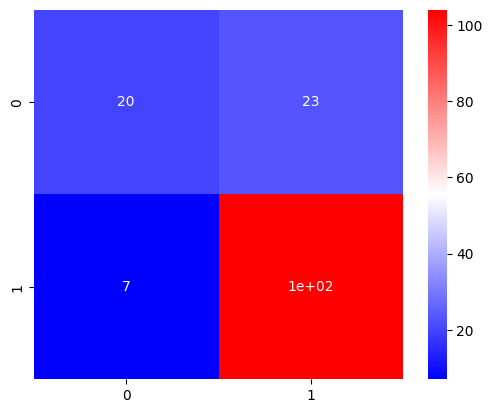

In [28]:
sns.heatmap(cm_test, square=True, annot=True, cmap='bwr')